In [55]:
pip install pandas==1.3.5


  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.2 requires matplotlib>=2.2, which is not installed.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings 

In [58]:
df = pd.read_csv('DMart_Grocery_Sales_-_Retail_Analytics_Dataset.csv')

In [59]:
df.head()

C:\Users\Anudeep\anaconda3\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\Anudeep\anaconda3\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [60]:
df.shape

(9994, 11)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [62]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [63]:
df.describe()

C:\Users\Anudeep\anaconda3\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [64]:
#check missing values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [65]:
# check duplicate values in dataset
df.duplicated().sum()

0

In [66]:
# Handle missing values (if any)
df.fillna(0, inplace=True)

In [67]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     5952 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

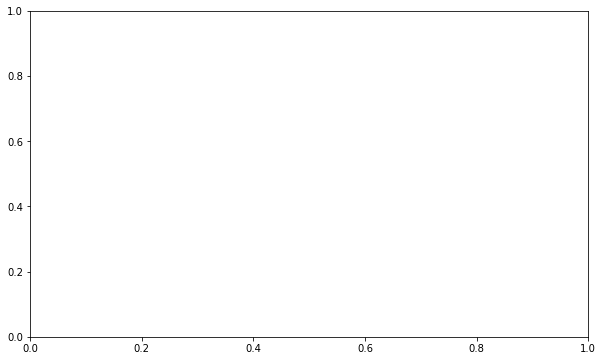

In [70]:
# Histogram for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30)  # Removed kde=True
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


C:\Users\Anudeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


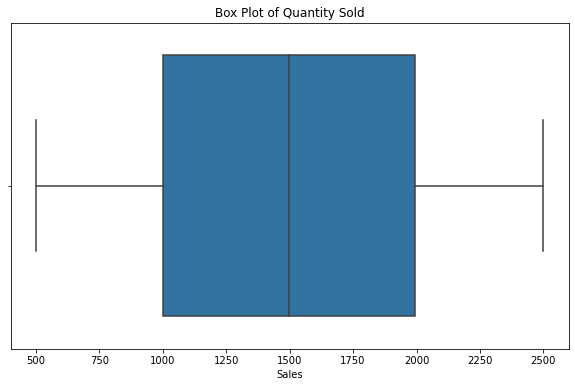

In [10]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(df['Sales'])
plt.title('Box Plot of Quantity Sold')
plt.show()

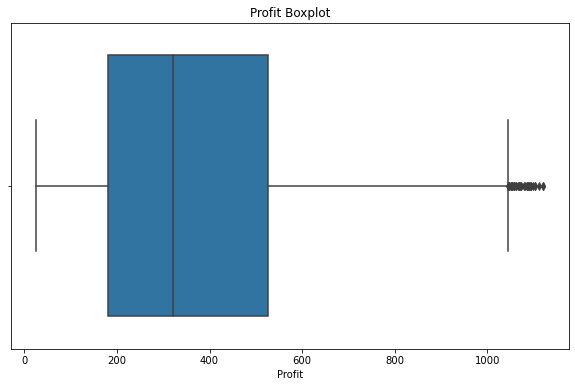

In [47]:
# Boxplot for Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.xlabel('Profit')
plt.show()

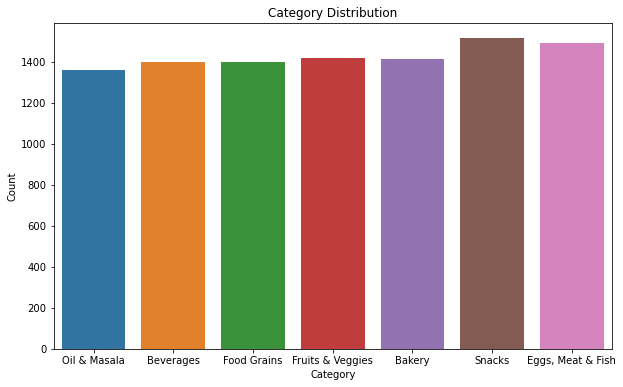

In [48]:
# Bar chart for Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

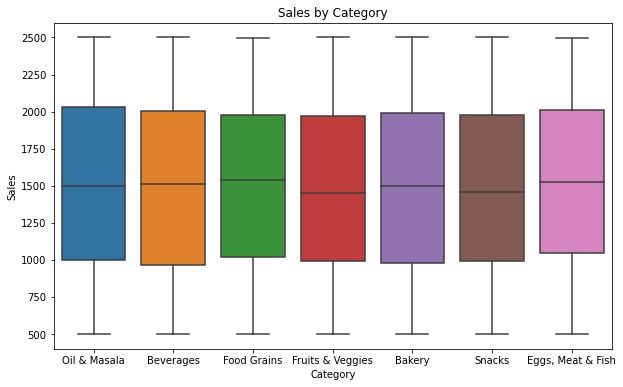

In [49]:
# Boxplot for Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

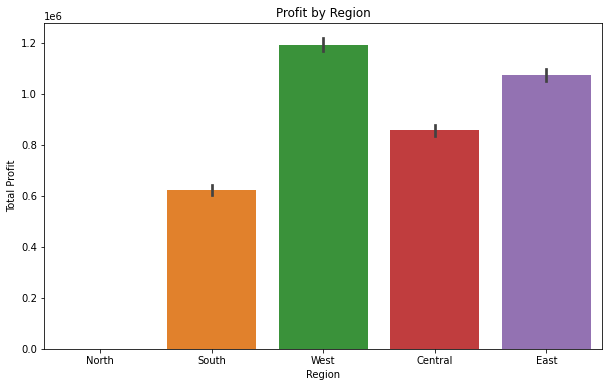

In [50]:
# Bar plot for Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

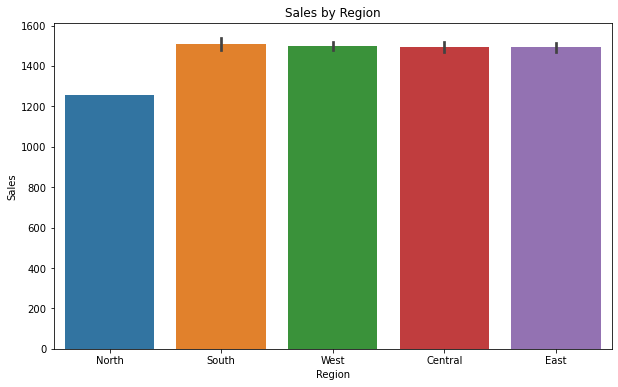

In [51]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

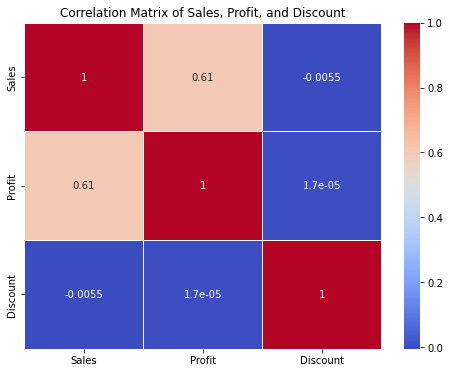

In [52]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales, Profit, and Discount')
plt.show()

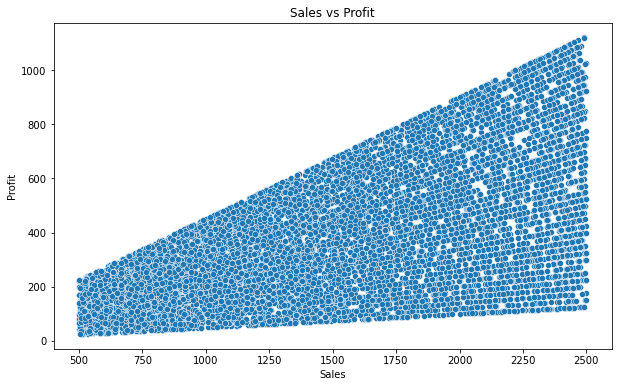

In [53]:
# Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


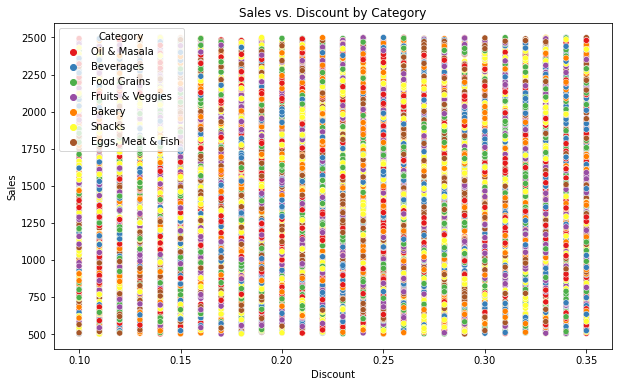

In [54]:
# Discount vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', palette='Set1')
plt.title('Sales vs. Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['Sales', 'Profit', 'Discount']
df_scaled = StandardScaler().fit_transform(df[features])


In [56]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


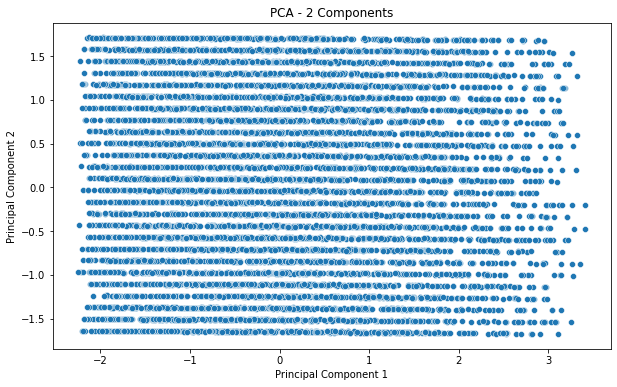

In [57]:
# Scatter plot for PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

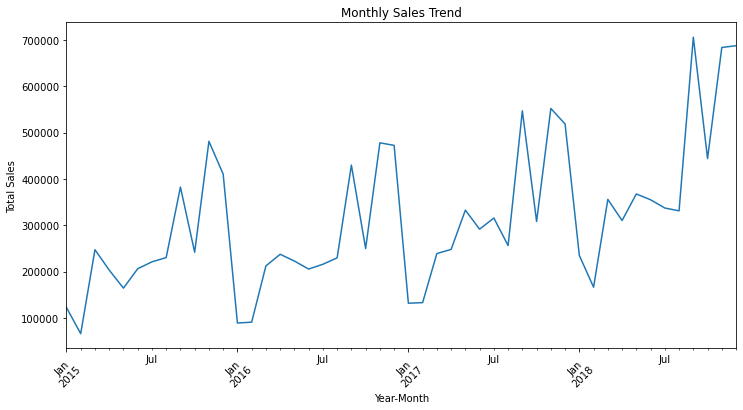

In [58]:
# Group by month and year for sales trend
df['YearMonth'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

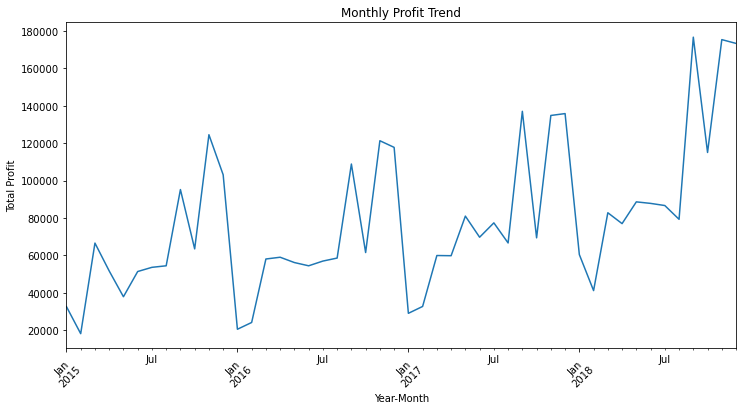

In [59]:
# Group by month and year for profit trend
profit_trend = df.groupby('YearMonth')['Profit'].sum()

# Plot profit trend
plt.figure(figsize=(12, 6))
profit_trend.plot()
plt.title('Monthly Profit Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Calculate IQR for Sales
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Define outlier thresholds
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Filter out outliers
df_filtered = df[(df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales)]

# Repeat for Profit
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

df_filtered = df_filtered[(df_filtered['Profit'] >= lower_bound_profit) & (df_filtered['Profit'] <= upper_bound_profit)]


In [ ]:
# Function to handle outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'Sales' and 'Profit'
df_cleaned = remove_outliers(df, 'Sales')
df_cleaned = remove_outliers(df_cleaned, 'Profit')

# Verify changes
print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape: {df_cleaned.shape}")
